In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [3]:
df = pd.read_csv('Etsy_preprocessed.csv')
df

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
...,...,...,...,...,...,...,...,...
687,692,0.001897,0.009345,0.988759,0.986862,Very sparkly and well made. Love them.,5.0,2.5
688,693,0.001501,0.017010,0.981489,0.979988,"Beautiful earrings, and arrived promptly!",5.0,2.5
689,694,0.001299,0.013365,0.985336,0.984036,Gorgeous earring! Simple and elegant.,5.0,2.5
690,695,0.003696,0.089749,0.906555,0.902858,Item as described. Shipped promptly. Thank you.,5.0,2.5


In [4]:

correlation = df['roberta_pos'].corr(df['ItemRating'])
print(f"Correlation between PositiveReview and ItemRating: {correlation}")

Correlation between PositiveReview and ItemRating: 0.34174443385173253


In [6]:
correlation = df['roberta_neg'].corr(df['ItemRating'])
print(f"Correlation between NegativeReview and ItemRating: {correlation}")

Correlation between NegativeReview and ItemRating: -0.5864808635260171


In [12]:
import spacy

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [24]:
df1= df.copy()

In [25]:
df1

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
...,...,...,...,...,...,...,...,...
687,692,0.001897,0.009345,0.988759,0.986862,Very sparkly and well made. Love them.,5.0,2.5
688,693,0.001501,0.017010,0.981489,0.979988,"Beautiful earrings, and arrived promptly!",5.0,2.5
689,694,0.001299,0.013365,0.985336,0.984036,Gorgeous earring! Simple and elegant.,5.0,2.5
690,695,0.003696,0.089749,0.906555,0.902858,Item as described. Shipped promptly. Thank you.,5.0,2.5


In [26]:
df1['Reviews'].fillna('', inplace=True)

In [29]:
reviews_with_delivery_or_shipping = df1[df1['Reviews'].str.contains('delivery|shipping', case=False)]
print(reviews_with_delivery_or_shipping[['Id','Reviews','ItemRating']])
#Delivery and shipping is great 

      Id                                            Reviews  ItemRating
1      2  Beautiful earrings. Fast shipping. Can’t wait ...         5.0
4      5  Truly beautiful earrings, quick delivery and s...         5.0
16    17  Great communication and rapid delivery.  Excel...         5.0
17    18  Super quick delivery, beautiful earrings, clea...         5.0
22    23  Item is lovely and looks great. Was as describ...         5.0
..   ...                                                ...         ...
662  667  I ordered these on a Tuesday afternoon and the...         5.0
671  676  Looks real diamonds and so much sparkle \nFast...         5.0
677  682  So sparkly!!! I’m in love! Please keep making ...         5.0
679  684  The shipping was nice and quick the earrings a...         5.0
686  691       Gorgeous earrings, fast shipping, very happy         5.0

[74 rows x 3 columns]


In [30]:
pd.set_option('display.max_rows', None)

In [31]:
df1

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


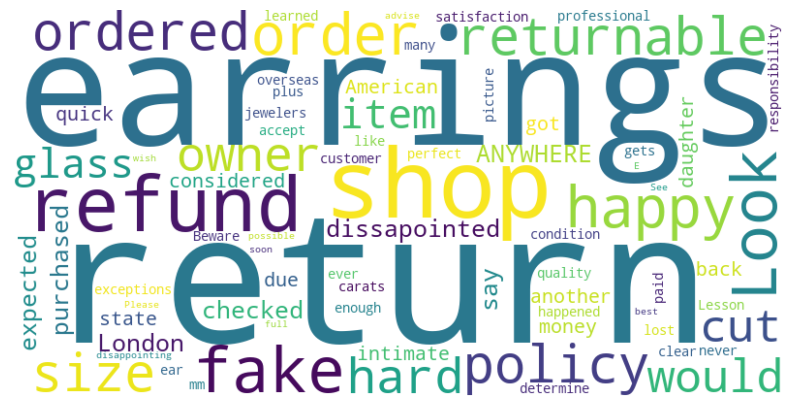

In [38]:
#creating a negative word cloud to find the negative review qualities of the product
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))

low_rating_reviews = df1[df1['ItemRating'] < 2]

text = ' '.join(low_rating_reviews['Reviews'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words)))

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
df1.loc[(df1['ShippingRating'] == 2.5) & (df1['ItemRating'].isin([4, 5])), 'ShippingRating'] = df1.loc[(df1['ShippingRating'] == 2.5) & (df1['ItemRating'].isin([4, 5])), 'ItemRating']
df1

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


In [62]:
importance_scores = {'ItemRating': 0.4, 'ShippingRating': 0.2, 'roberta_compound': 0.4}
avg_item_rating = df1['ItemRating'].mean()
avg_shipping_rating = df1['ShippingRating'].mean()
avg_sentiment_score = df1['roberta_compound'].mean()

max_item_rating = 5
max_shipping_rating = 5
max_sentiment_score = 1

satisfaction_scores = {'ItemRating': avg_item_rating/max_item_rating, 'ShippingRating': avg_shipping_rating/max_shipping_rating, 'roberta_compound': avg_sentiment_score/max_sentiment_score}
weighted_satisfaction_scores = {attribute: satisfaction_scores[attribute] * importance_scores[attribute] for attribute in importance_scores}

CSI = sum(weighted_satisfaction_scores.values()) / (sum(importance_scores.values()))


if 0 <= CSI <= 1:
    CSI = round(CSI, 2)
    print(f"The CSI value is {CSI}, indicating positive customer satisfaction level.")
elif -1 < CSI < 0:
    CSI = round(CSI, 2)
    print(f"The CSI value is {CSI}, indicating negative customer satisfaction level.")
else:
    print("The CSI value is 0, indicating neutral customer satisfaction level.")
    


The CSI value is 0.95, indicating positive customer satisfaction level.


In [52]:
avg_item_rating = df1['ItemRating'].mean()
avg_shipping_rating = df1['ShippingRating'].mean()
avg_sentiment_score = df1['roberta_compound'].mean()

In [43]:
print (avg_item_rating)

4.864161849710983


In [44]:
print (avg_shipping_rating)

4.859104046242774


In [45]:
print (avg_sentiment_score)

0.9049781511797352


C:\Users\user\AppData\Local\Temp\ipykernel_13724\2414538690.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['roberta_compound'] = (df2['roberta_compound'] - df2['roberta_compound'].min()) / (df2['roberta_compound'].max() - df2['roberta_compound'].min())


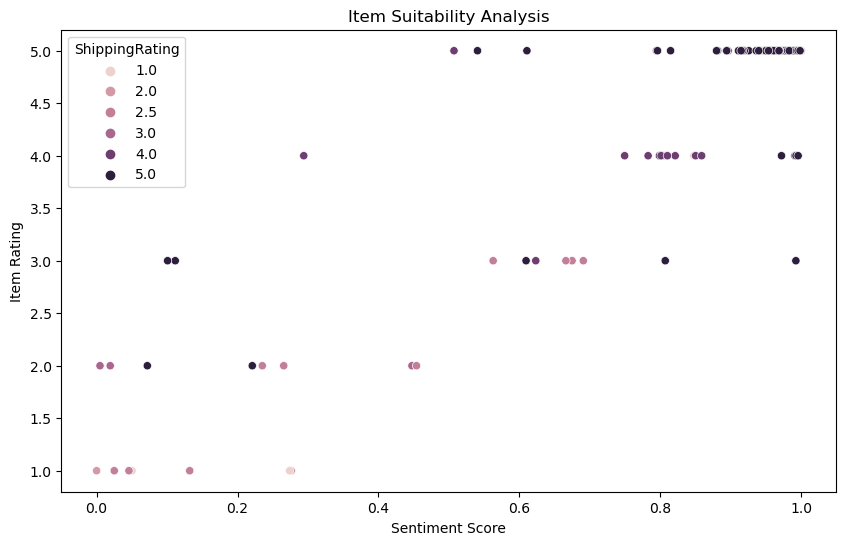

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df1[['roberta_compound', 'ItemRating', 'ShippingRating']]

df2['roberta_compound'] = (df2['roberta_compound'] - df2['roberta_compound'].min()) / (df2['roberta_compound'].max() - df2['roberta_compound'].min())

plt.figure(figsize=(10, 6))
sns.scatterplot(x='roberta_compound', y='ItemRating', hue='ShippingRating', data=df2)
plt.title('Item Suitability Analysis')
plt.xlabel('Sentiment Score')
plt.ylabel('Item Rating')
plt.show()

In [65]:
df1.to_csv('Etsy_preprocessed2.csv', index=False)

print("DataFrame has been saved to csv")

DataFrame has been saved to csv
